# Core Assignment: Hypothesis Testing
## Student: Joseph Lim

Answer the following questions with the following criteria using the given data set:

Questions:

1. Do smokers have higher insurance charges than non-smokers?
2. Are men more likely to smoke than women?
3. Do different regions have different charges, on average?

Criteria:
* State your Null Hypothesis and Alternative Hypothesis
* Select the correct test according to the data type and number of samples
* Test the assumptions of your selected test.
* Execute the selected test, or the alternative test (if you do not meet the assumptions)
* Interpret your p-value and reject or fail to reject your null hypothesis 
* Show a supporting visualization that helps display the result

Data Dictionary:

| Category   | Description                              | Data Type                          |
|------------|------------------------------------------|------------------------------------|
| age        | Age of beneficiary                       | int                                |
| sex        | Contractor gender                        | string(male/female)                |
| bmi        | Body Mass Index                          | float                              |
| # children | Number of Children                       | int                                |
| smoker     | If the patient is a smoker or not        | string (yes/no)                    |
| region     | Residential area in the US               | string(northeast, southwest, etc.) |
| charges    | Medical costs billed by health insurance | float                              |

## Importing Libraries and data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("insurance - insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Do smokers have higher insurance charges than non-smokers?

Null Hypothesis: Smokers do not have higher insurance charges than non-smokers.

Alternative Hypothesis: Smokers do have higher insurance charges than non-smokers.

Alpha = 0.05

Test to use: Numerical Data (insurance charges) + Two Groups (smoker vs. non-smoker) = 2 Sample T-Test

* Test the assumptions of your selected test.
* Execute the selected test, or the alternative test (if you do not meet the assumptions)
* Interpret your p-value and reject or fail to reject your null hypothesis 
* Show a supporting visualization that helps display the result

In [8]:
#Checking values and percentage of the dataset that is Male vs. Female
print(df["smoker"].value_counts())
print(df["smoker"].value_counts()/len(df["smoker"]))

no     1063
yes     274
Name: smoker, dtype: int64
no     0.795064
yes    0.204936
Name: smoker, dtype: float64


In [9]:
# making dfs for males and females
smoker_df = df.loc[df["smoker"] == "yes"].copy()
nonsmoker_df = df.loc[df["smoker"] == "no"].copy()

In [10]:
# getting charges for smokers vs non smokers
smoker_insurance = smoker_df["charges"]
nonsmoker_insurance = nonsmoker_df["charges"]

In [11]:
## Getting means for gender height
print(f"For smokers (n={len(smoker_insurance)}): Mean={np.mean(smoker_insurance):.2f}")
print(f"For nonsmokers (n={len(nonsmoker_insurance)}): Mean={np.mean(nonsmoker_insurance):.2f}")

For smokers (n=274): Mean=32050.23
For nonsmokers (n=1063): Mean=8440.66


In [12]:
# Check for outliers in insurance for smoker group
zscores = stats.zscore(smoker_insurance)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [13]:
# Check for outliers in insurance for non-smoker group
zscores = stats.zscore(nonsmoker_insurance)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [14]:
#Removing outliers
nonsmoker_insurance = nonsmoker_insurance[(np.abs(stats.zscore(nonsmoker_insurance)) < 3)]

In [15]:
# Sample size is large (> 15), therefore p value is okay to be failed
# test the strength group for normality
result_smoker_insurance = stats.normaltest(smoker_insurance)
result_smoker_insurance

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [16]:
# Test for equal variance
result = stats.levene(smoker_insurance, nonsmoker_insurance)
result

#Non-equal variances, "equal_var = False" arg to be used during t-test

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

In [17]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_insurance, nonsmoker_insurance, equal_var = False)
result

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)

p value is less than alpha (0.05), therefore we fail to reject our null hypothesis.

<AxesSubplot: xlabel='smoker', ylabel='charges'>

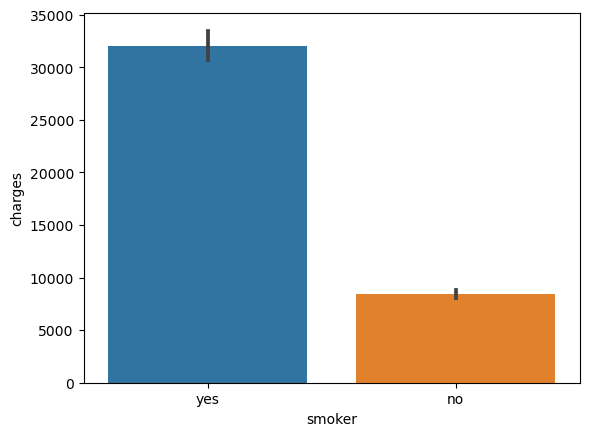

In [18]:
sns.barplot(data = df, x = "smoker", y = "charges")

## Are men more likely to smoke than women?

Null Hypothesis: Men are equally as likely to smoke as women.

Alternative Hypothesis: Men are more likely to smoke than women.

Alpha = 0.05

Test to use: Categorical Data (smoke vs. no smoke) + Two groups (men vs. women) = Chi-Square Test

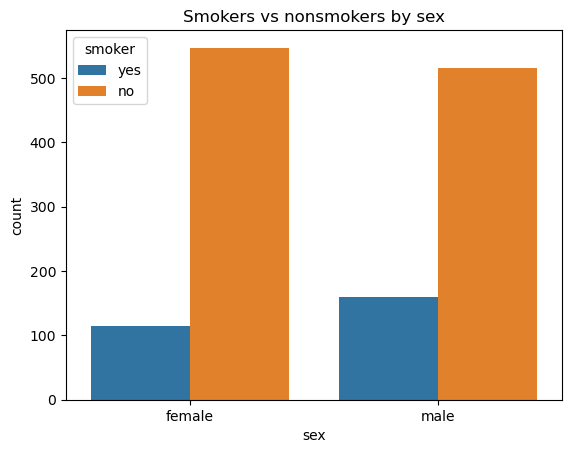

In [19]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Smokers vs nonsmokers by sex");

In [20]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df["sex"], df["smoker"])
table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [21]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [22]:
# What was our p-value?
print(p)
p < 0.05

0.0062765550120107375


True

Our p value is < 0.05, therefore we have a significant result and therefore fail to reject our null hypothesis.

## Do different regions have different charges, on average?

Null Hypothesis: Different regions do not have different charges on average.

Alternative Hypothesis: Different regions do have different charges on average.

Alpha = 0.05

Test to use: Numerical Data (insurance charges) + multiple group comparison = ANOVA and/or Tukey

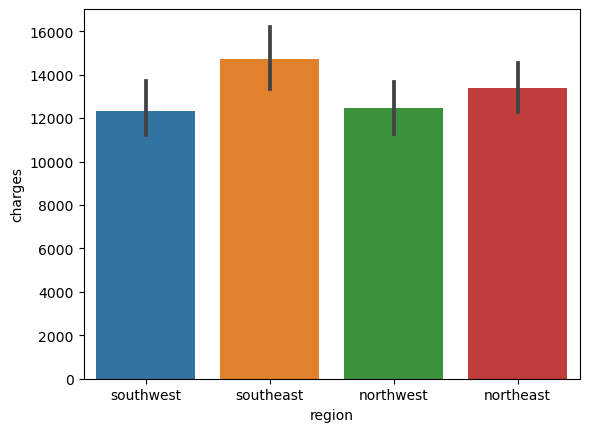

In [23]:
sns.barplot(data=df, x='region',y='charges');

In [24]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [25]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,324.0,6.502634e-24,106.779670,True
northeast,324.0,1.455431e-19,86.747629,True


In [26]:
#Running equal variance test
stats.levene(*groups.values())

LeveneResult(statistic=5.553479860699911, pvalue=0.0008689544824002284)

In [27]:
#Failed Equal Variance Test, therefore need to run kruskal

#run kruskal
stats.kruskal(*groups.values())

KruskalResult(statistic=4.622506584464645, pvalue=0.20161983372311595)

Our p value is < 0.05, therefore we have a significant result and therefore fail to reject our null hypothesis.